In [1]:
#Decision trees
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df=pd.read_csv(r"C:\Users\linag\Downloads\titanic.csv", sep=',')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
df.isnull().sum().sum()

866

In [3]:
df=df.dropna(axis=0,how='any',inplace=False)
df.isnull().sum().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [5]:
df["Sex"]=df["Sex"].map({"female":0, "male":1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S


In [6]:
X = df[['Pclass','Sex','Age']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy {:.2f}'.format(model.score(X_test, y_test)))

Accuracy 0.73


<Axes: xlabel='predicted', ylabel='actual'>

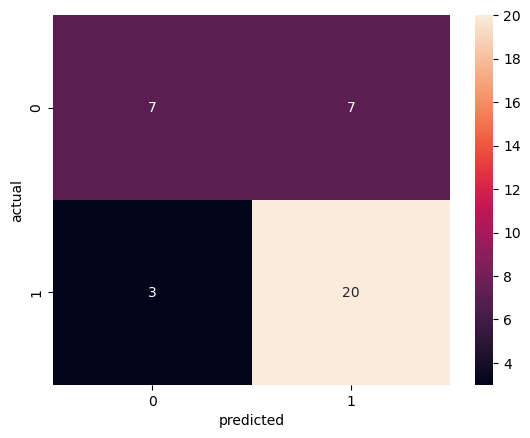

In [7]:
confusion_matrix=pd.crosstab(y_test, y_pred, rownames=['actual'], colnames= ['predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [8]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.74      0.87      0.80        23

    accuracy                           0.73        37
   macro avg       0.72      0.68      0.69        37
weighted avg       0.73      0.73      0.72        37



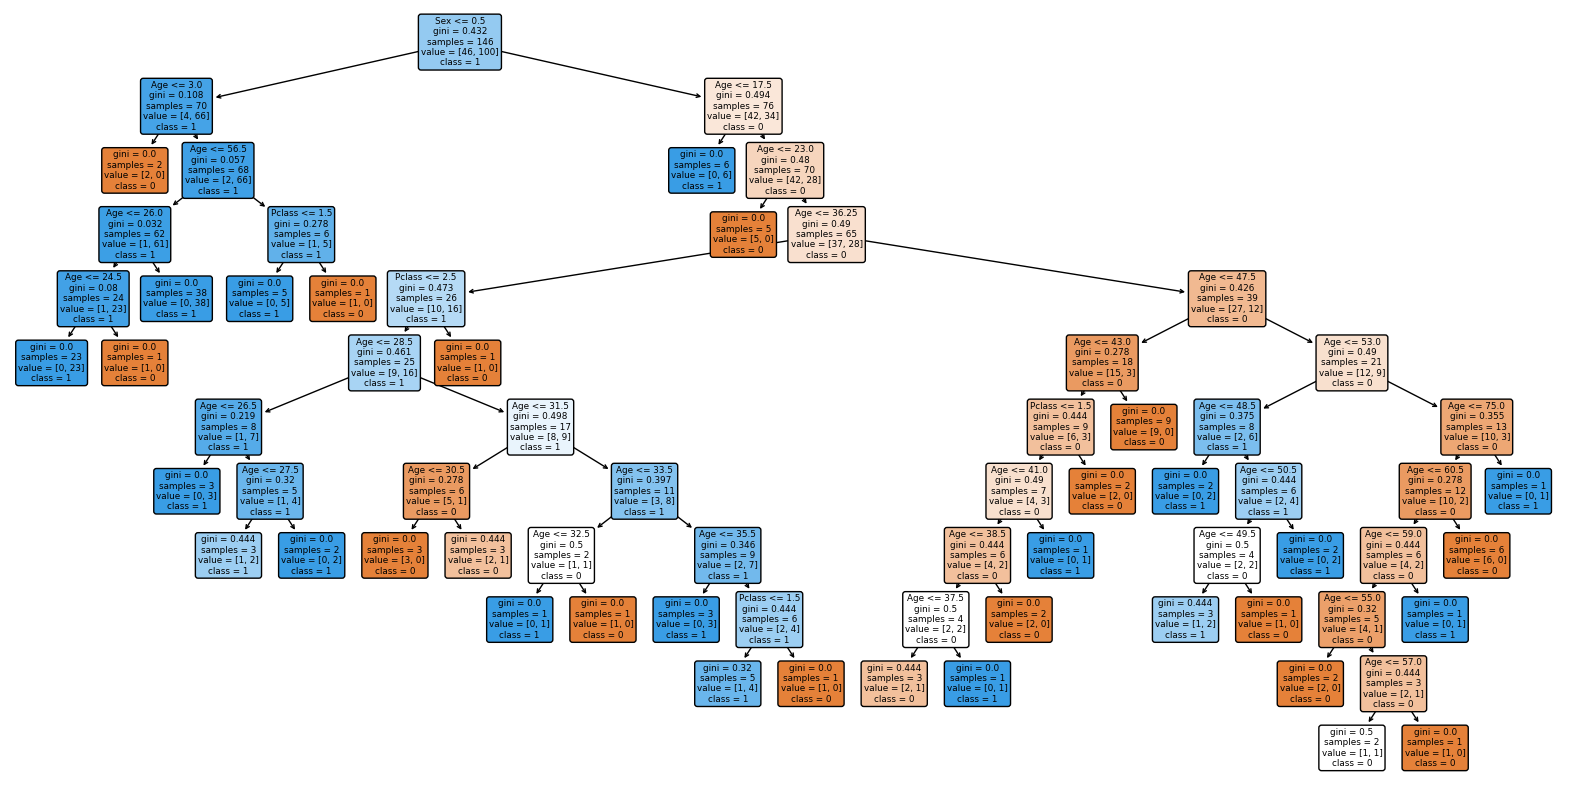

In [9]:
feature_names = X.columns.tolist()
class_names = list(map(str, model.classes_))
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()

In [10]:
#from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Create a Decision Tree Classifier with modified parameters
model_modified = DecisionTreeClassifier(max_depth=5, min_samples_split=2)

# Train the modified model on the training set
model_modified.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_modified = model_modified.predict(X_test)

# Evaluate the modified model
accuracy_modified = accuracy_score(y_test, y_pred_modified)
conf_matrix_modified = confusion_matrix(y_test, y_pred_modified)
classification_rep_modified = classification_report(y_test, y_pred_modified)

print("Modified Model Accuracy:", accuracy_modified)
print("Modified Model Confusion Matrix:\n", conf_matrix_modified)
print("Modified Model Classification Report:\n", classification_rep_modified)

Modified Model Accuracy: 0.7297297297297297
Modified Model Confusion Matrix:
 [[ 9  5]
 [ 5 18]]
Modified Model Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64        14
           1       0.78      0.78      0.78        23

    accuracy                           0.73        37
   macro avg       0.71      0.71      0.71        37
weighted avg       0.73      0.73      0.73        37



In [11]:
#from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)

# Train the Random Forest model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Classification Report:\n", classification_rep_rf)

Random Forest Accuracy: 0.7297297297297297
Random Forest Confusion Matrix:
 [[ 7  7]
 [ 3 20]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.74      0.87      0.80        23

    accuracy                           0.73        37
   macro avg       0.72      0.68      0.69        37
weighted avg       0.73      0.73      0.72        37



In [12]:
#We can see here that random forest method gives as a more specific result, therefor it's better than decision tree in terms of accuracy